# BanK Customer Churn

# I. Import Libraries

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# II. Load and Understand dataset

In [147]:
file_name = "/Users/huuthinle/Downloads/Churn Modeling.csv"
df = pd.read_csv(file_name)
df = pd.DataFrame(df)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [148]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [149]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [150]:
df.shape

(10000, 14)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [152]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


In [153]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [154]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

>> Notes: There's no missing values in this dataset. In case of existing missing values, imputation techniques (mean, median, mode) or data remowals would be applied to deal with missing values

# III. Explore Data Distribution


## 1. Univariate Analysis 

### 1.1. Total Bank Churn Rate - Target Variable

In [155]:
churn_member_count = df[df['Exited'] == 1].shape[0]
customer_count = df['Exited'].count()

churn_rate = churn_member_count*100/customer_count
print (f'Number of churn_member_count:{churn_member_count}')
print(f'Total bank churn rate: {churn_rate}%')

Number of churn_member_count:2037
Total bank churn rate: 20.37%


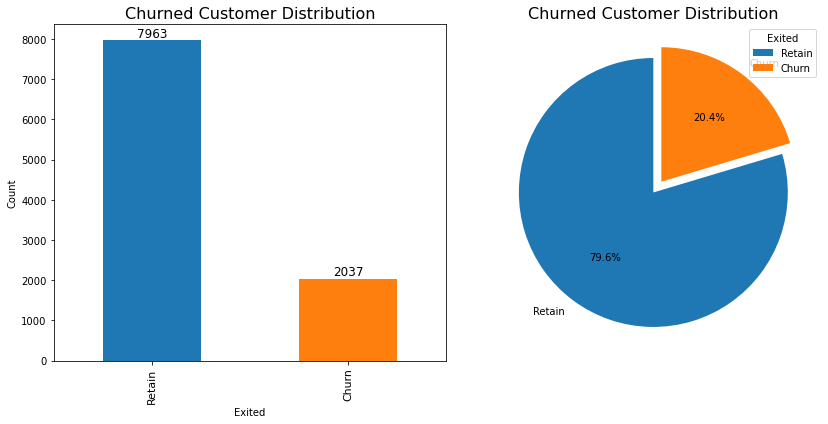

In [156]:
count = df['Exited'].value_counts()
sns.set_palette('tab10')
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Bar plot for Churned Customer Distribution
count.plot(kind='bar', ax=ax[0], color=sns.color_palette('tab10'))  # Set bar colors
ax[0].bar_label(ax[0].containers[0], labels=count.values, fontweight="light", fontsize=12)
ax[0].set_title("Churned Customer Distribution", fontsize=16, fontweight='ultralight')
ax[0].set_xlabel("Exited")
ax[0].set_ylabel("Count")
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Retain', 'Churn'], fontsize=11)

# Pie chart for Churned Customer Distribution
ax[1].pie(count, labels=['Retain', 'Churn'], autopct='%1.1f%%', startangle=90, explode=[0, 0.1], colors=sns.color_palette('tab10')[:2])
ax[1].set_title("Churned Customer Distribution", fontsize=16, fontweight='ultralight')
ax[1].legend(labels=['Retain', 'Churn'], title="Exited", loc="upper right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


> Findings: 
The charts indicate that 20.37% of customers have churned. The business's objective is to address this high churn rate.

### 1.2. Demographic Variables

#### A. Geography Variable

In [157]:
num_country = len(df['Geography'].unique())
print (f"Number of countries: {num_country}")
print(f"Unique values: {df['Geography'].unique()}")

Number of countries: 3
Unique values: ['France' 'Spain' 'Germany']


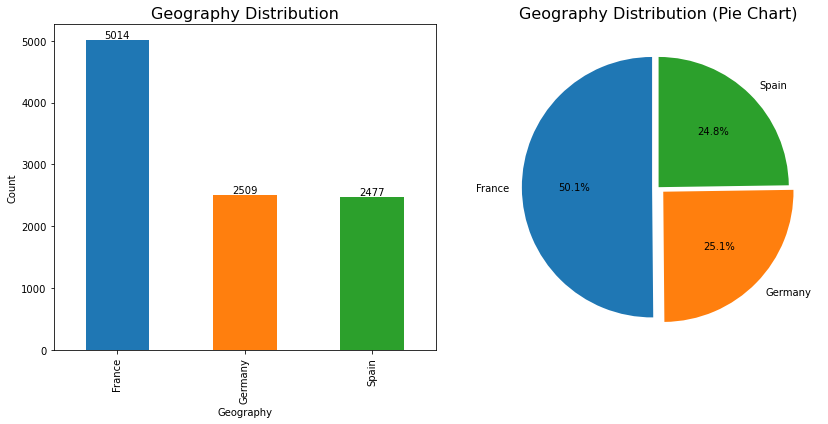

In [158]:
geo_count = df['Geography'].value_counts()
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
sns.set_palette('tab10')

# Bar plot for Geography distribution
geo_count.plot(kind='bar', ax=ax[0],color=sns.color_palette('tab10'))
ax[0].bar_label(ax[0].containers[0], labels=geo_count.values, 
                fontweight="light", fontsize=10)
ax[0].set_title("Geography Distribution",  fontsize=16, fontweight= 'ultralight')
ax[0].set_xlabel("Geography")
ax[0].set_ylabel("Count")

ax[1].pie(geo_count, labels=geo_count.index,autopct='%1.1f%%', startangle=90, explode = [0.05,0.05,0])
ax[1].set_title("Geography Distribution (Pie Chart)", fontsize=16, fontweight= 'ultralight')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


> Findings: Half of bank customers comes from France, while there is no big gap for Spain and Germany, with 24,8% and 25,1% respectively.


#### B. Age Column

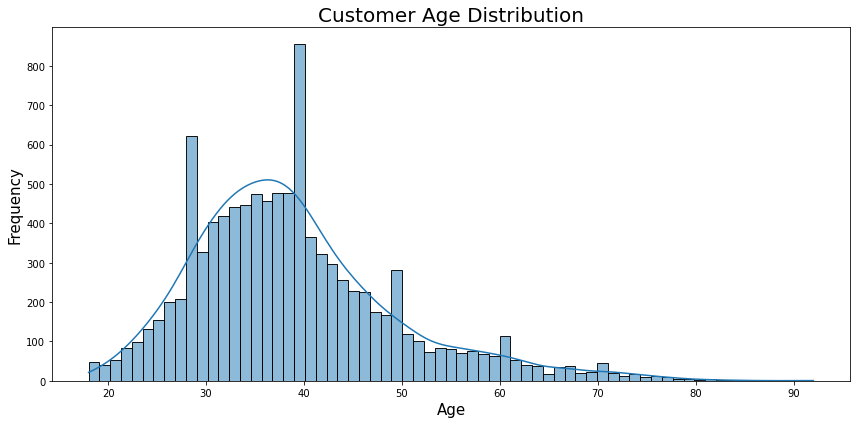

In [159]:
plt.figure(figsize = (12,6))
sns.histplot(data = df, x = 'Age', kde = True)
sns.set_palette('tab10')

plt.title ('Customer Age Distribution', size = 20)
plt.ylabel ('Frequency', size = 15)
plt.xlabel ('Age', size = 15)
plt.tight_layout()

> Findings: 
>> The distrition of customer age is skewed to the left, which is concentrated around 30 - 50 years, with fewer customers in the older age range. \
>>This suggests that most customers are middle-aged, which might be relevant depending on the bank’s target demographic.

#### C. Gender Distribution

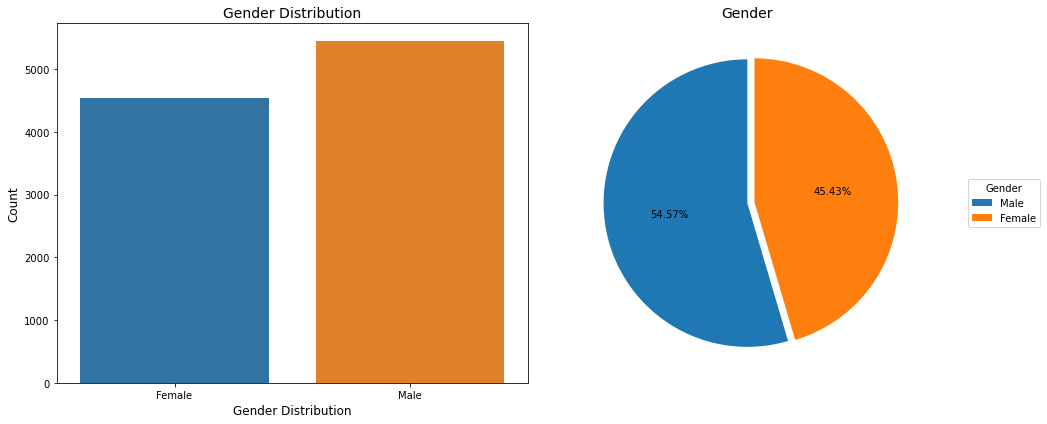

In [160]:
# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # Correct function name is `plt.subplots`
sns.set_palette('tab10')
# First subplot: Count plot for Number of Products
sns.countplot(data=df, x='Gender', ax=ax[0])
ax[0].set_title('Gender Distribution', fontsize=14)
ax[0].set_xlabel('Gender Distribution', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

# Second subplot: Pie chart
No_ProdCount = df['Gender'].value_counts()

ax[1].pie(No_ProdCount, 
          autopct='%.2f%%', 
          pctdistance=0.55, 
          explode = [0,0.05],
          startangle=90,   # Dynamically create explode
          colors=sns.color_palette(('tab10') ,len(No_ProdCount)))

ax[1].set_title('Gender', fontsize=14)

# Add a legend outside the pie chart
ax[1].legend(labels=No_ProdCount.index, title="Gender", loc="center left", bbox_to_anchor=(1.1, 0.5))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Credit Score

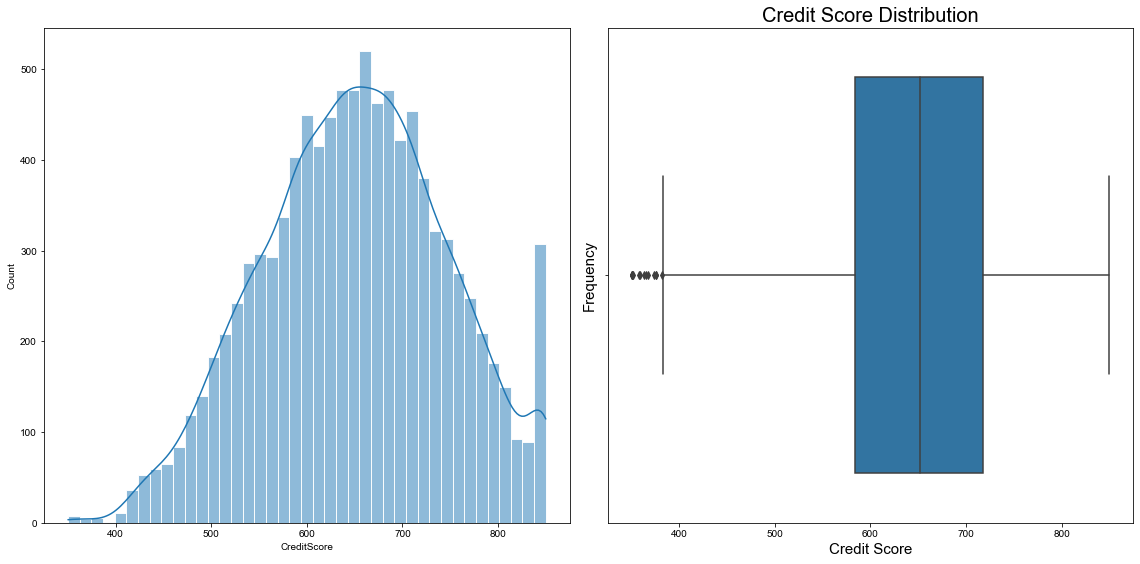

In [161]:
fig, ax = plt.subplots(1,2, figsize = (16,8))

sns.set_theme(style="darkgrid")
sns.set_palette('tab10')

sns.histplot(x = df['CreditScore'], kde=True, ax = ax[0])
 
sns.boxplot(x = df['CreditScore'],ax = ax[1])

plt.title ('Credit Score Distribution', size = 20)
plt.ylabel('Frequency', size = 15)
plt.xlabel ('Credit Score', size = 15)
plt.tight_layout()

> **Findings:** 
>> The Credit Score Distribution exhibits a slight right skew, with a few lower outliers present. This means that the majority of customers have a good credit score.








## Tenure Column

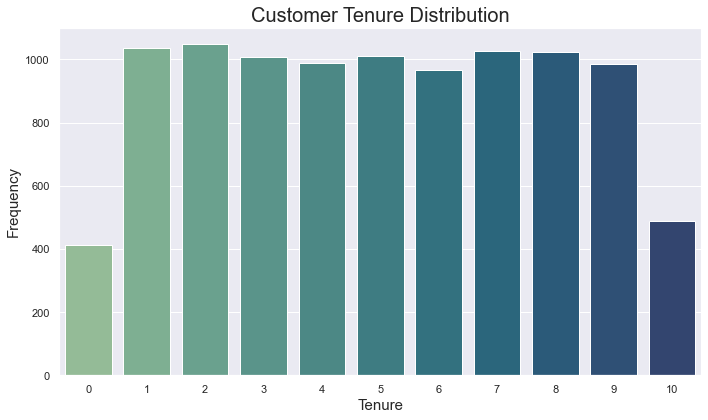

In [162]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tenure', palette = "crest")

# Title and labels
plt.title('Customer Tenure Distribution', size=20)
plt.ylabel('Frequency', size=15)
plt.xlabel('Tenure', size=15)

plt.tight_layout()

# Show the plot
plt.show()

>**Findings:** There is a balance on customer base across the tenure length

## Balance Column

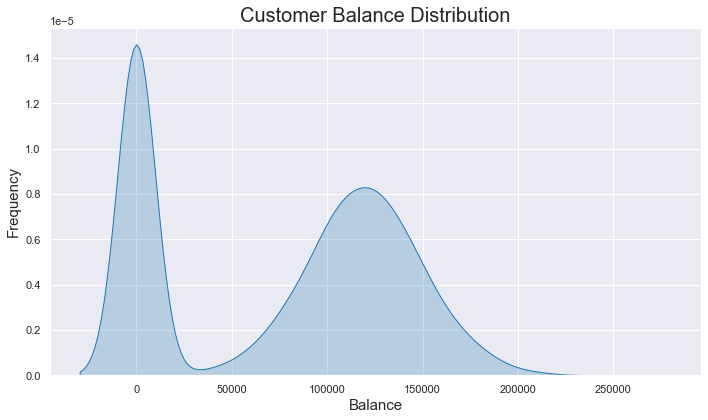

In [163]:
# Create the countplot

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Balance',fill=True)
sns.set_palette('tab10')
# Title and labels
plt.title('Customer Balance Distribution', size=20)
plt.ylabel('Frequency', size=15)
plt.xlabel('Balance', size=15)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

> **Findings:** There is bimodal distribution on customer balance base. This draws a question about customer segments whether 
>> * low-balance customers may be more likely to churn
>> * High-balance customers who are likely more engaged and loyal.

## Estimated Salary Distribution

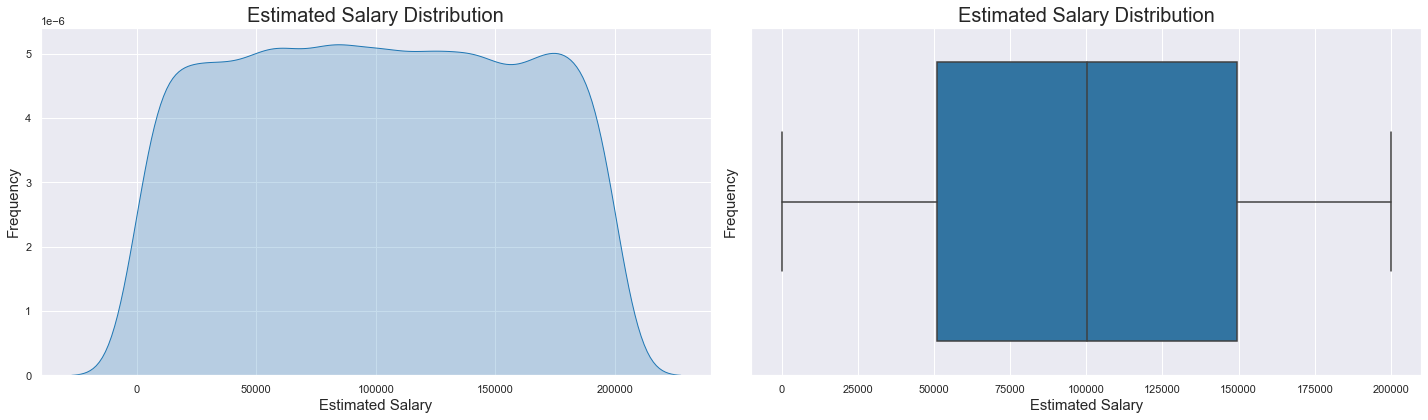

In [164]:
fig, ax =plt.subplots(1, 2, figsize=(20, 6))

sns.kdeplot(data=df, x='EstimatedSalary', ax=ax[0], fill = True)
sns.set_palette('tab10')
# Title and labels for the boxplot
ax[0].set_title('Estimated Salary Distribution', size=20)
ax[0].set_ylabel('Frequency', size=15)
ax[0].set_xlabel('Estimated Salary', size=15)

# Create a countplot or boxplot
sns.boxplot(data=df, x='EstimatedSalary', ax=ax[1])

# Title and labels for the boxplot
ax[1].set_title('Estimated Salary Distribution', size=20)
ax[1].set_ylabel('Frequency', size=15)
ax[1].set_xlabel('Estimated Salary', size=15)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

  ### No.Products, CreditCard, Activemember Variables

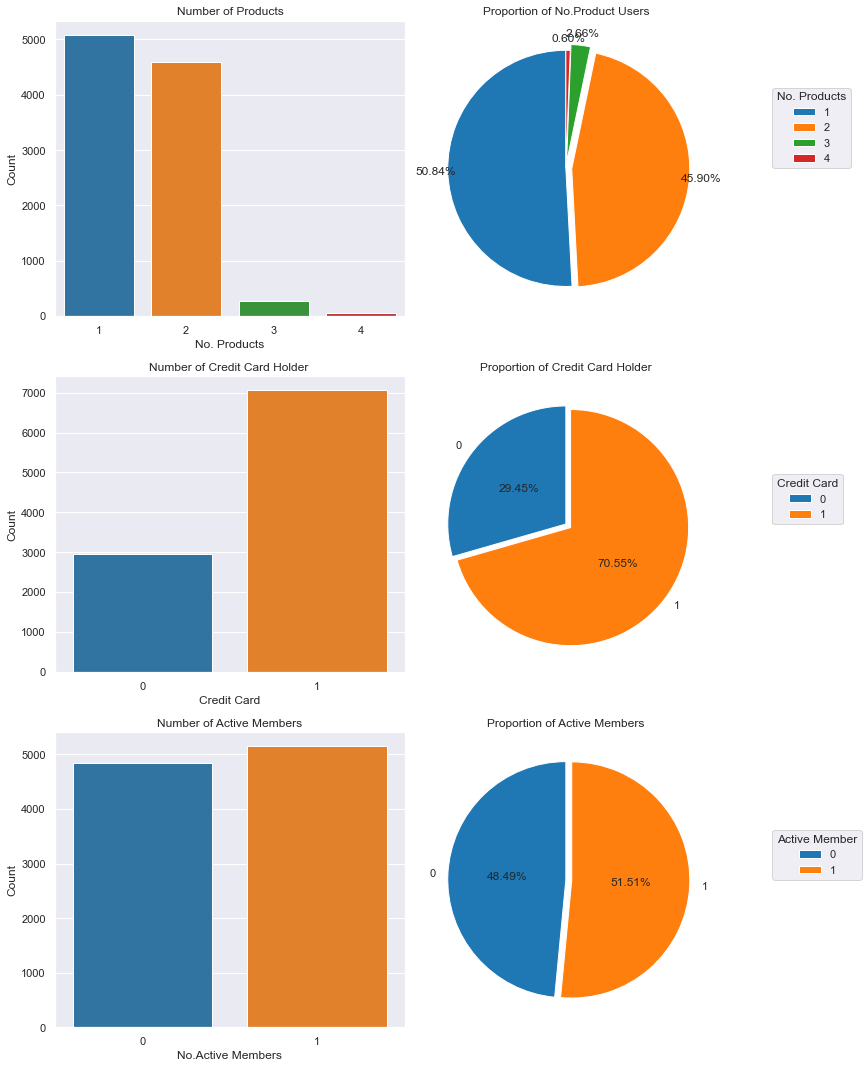

In [165]:
# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(12, 15))
sns.set_palette('tab10')
# NumOfProducts Column
## First subplot: CountPlot 
sns.countplot(data=df, x='NumOfProducts', ax=ax[0, 0])
ax[0, 0].set_title('Number of Products')
ax[0, 0].set_xlabel('No. Products')
ax[0, 0].set_ylabel('Count')

# Second subplot: Pie chart
No_ProdCount = df['NumOfProducts'].value_counts()
ax[0, 1].pie(No_ProdCount, autopct = '%.2f%%',
         pctdistance = 1.1,
         startangle = 90,
            explode = [0, 0.05, 0.05, 0])
ax[0, 1].set_title('Proportion of No.Product Users')
ax[0,1].legend(No_ProdCount.index, title="No. Products", loc=[1.2,0.5])


# HasCrCard Column
## First subplot: CountPlot 
No_CrCard = df['HasCrCard'].value_counts().sort_values (ascending = True)

sns.countplot(data=df, x='HasCrCard', ax=ax[1, 0])
ax[1,0].set_title('Number of Credit Card Holder ')
ax[1,0].set_xlabel('Credit Card')
ax[1,0].set_ylabel('Count')

## Second subplot: Pie chart
ax[1, 1].pie(No_CrCard, labels = No_CrCard.index, autopct = '%.2f%%',
         pctdistance = 0.5,
         startangle = 90,
            explode = [0,0.05])
ax[1, 1].set_title('Proportion of Credit Card Holder')
ax[1,1].legend(No_CrCard.index, title="Credit Card", loc=[1.2,0.5])


# IsActiveMember Column
## First subplot: CountPlot 

No_Active = df['IsActiveMember'].value_counts().sort_values (ascending = True)
sns.countplot(data=df, x='IsActiveMember', ax=ax[2, 0])
ax[2, 0].set_title('Number of Active Members')
ax[2, 0].set_xlabel('No.Active Members')
ax[2, 0].set_ylabel('Count')

# Second subplot: Pie chart
ax[2, 1].pie(No_Active, labels = No_Active.index, autopct = '%.2f%%',
         pctdistance = 0.5,
         startangle = 90,
            explode = [0,0.05])
ax[2, 1].set_title('Proportion of Active Members')
ax[2,1].legend(No_Active.index, title="Active Member", loc=[1.2,0.5])


plt.tight_layout()
plt.show()

## 2. Bivariate Analysis

### 2.1.Number Variables with Exited

In [166]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


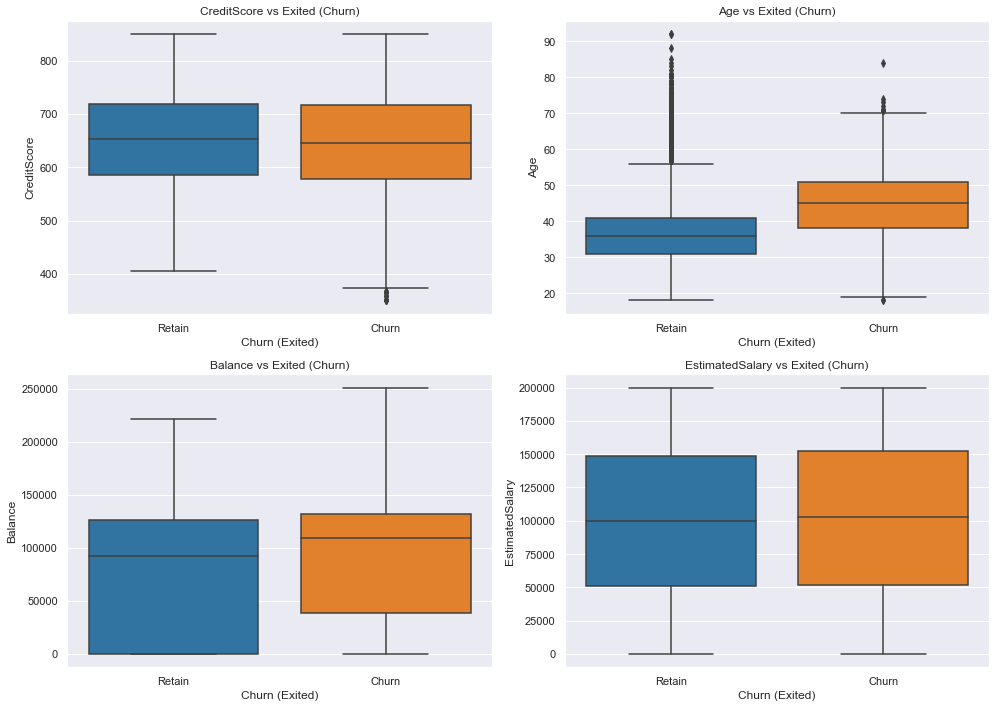

In [167]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Plotting the relationship between each numerical feature and churn (Exited)
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.xticks([0,1],['Retain', 'Churn'], fontsize=11)

    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel('Churn (Exited)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

> **Findings:** 
 >>  ***Credit Score with Exit Variable:*** A common in credit score of retained and exited customers, which dispers around 600 - 700 scores. Noteably, all low credit score customers lie on churned list. \
 >> ***Age with Exit Variable:*** Age Distribution is similar between Retained and Exited Customers, which is around 30 - 50 years old. \
 >> ***Balance with Exited Variable:*** Surprisingly, account balance of churned customer is more concentrated (from 40k to 130k) than retained customers, with high dispersion from zero. \
 >> ***Estimated Salary with Exited Variable:*** There is no difference on salary distribution of retained and churned customer, which are concentrated around 50k -100k.

### 2.2. Categorical Variables with Exited

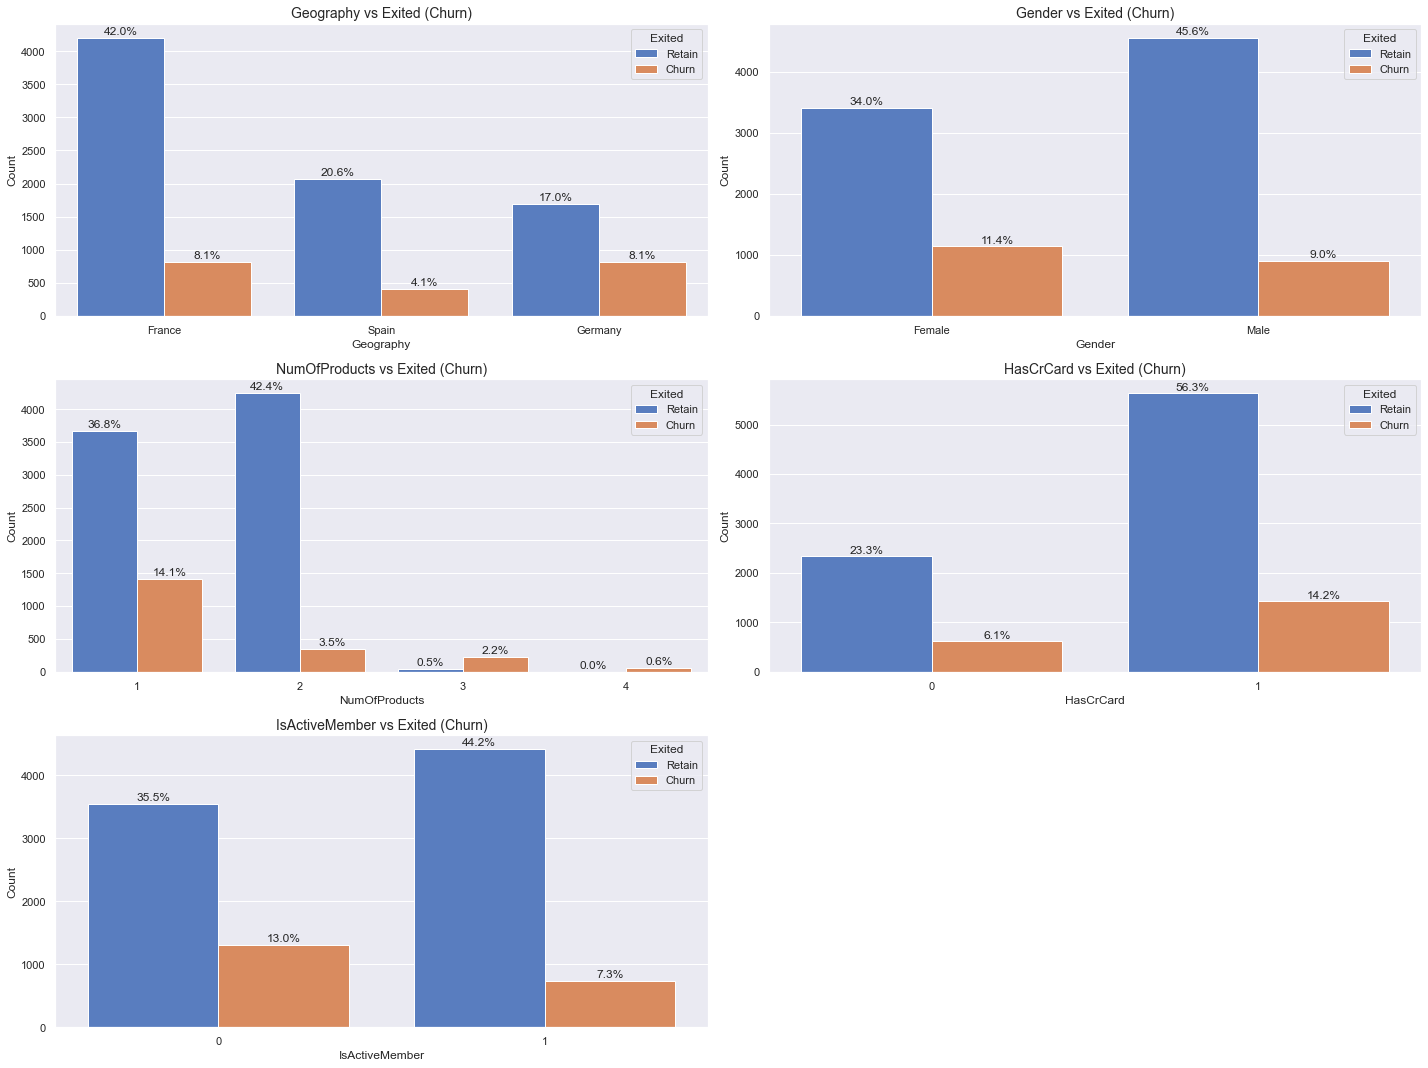

In [168]:
# List of categorical features to analyze
cat_features = ['Geography','Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Plotting the relationship between each categorical feature and churn (Exited)
plt.figure(figsize=(20, 15))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 2, i)
    
    # Create the count plot
    g = sns.countplot(x=feature, hue='Exited', data=df, palette='muted')
    
    # Add title and labels
    plt.title(f'{feature} vs Exited (Churn)', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Exited', labels=['Retain', 'Churn'], fontsize=11)

    # Add percentage annotations to each bar
    total = len(df)
    for p in g.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        g.annotate(f'{percentage:.1f}%', 
                   (p.get_x() + p.get_width() / 2, height + 20), 
                   ha='center', va='bottom', fontsize=12)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


> **Findings**: 
>> ***Geography with Exited:*** The number of churned customer in France and Germany is similar, around 810 customers, while in Spain, it is lower at 410. However, the churn rate in Germany should be approximately 40%, which is about double the rate in France, which is around 20%. \
>> ***Gender with Exited:*** Female, at 11.4%, have tendency to exit than Male with only 9%. \
>> ***Credit Card User with Exited:*** Credit Card Users, at 14.2%, have higher churn rate than Non-Credit Card User, at only 6.1%.\
>> ***Product Usage with Exited:*** Approximately 14.1% of customers using only one product have churned, which is higher compared to other groups. Notably, customers using three or four products have a retention rate close to zero, with almost no retained customers in those groups. \
>> ***Customer Status with Exited:*** No surprise that Inactive members have a higher churn rate than active members, at 13.0% and 7.3% respectively.

## 3. Multivariate Analysis

In [169]:
# One-Hot Encoding for 'Geography'
df_encoded = pd.get_dummies(df, columns=['Geography'])

# Binary Encoding for 'Gender'
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Display the encoded dataframe
print("Encoded DataFrame Head:\n", df_encoded.head())

Encoded DataFrame Head:
    RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619       1   42       2   
1          2    15647311      Hill          608       1   41       1   
2          3    15619304      Onio          502       1   42       8   
3          4    15701354      Boni          699       1   39       1   
4          5    15737888  Mitchell          850       1   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  Geography_France  Geography_Germany  Geography_Spain  
0       1              Tr

<Axes: >

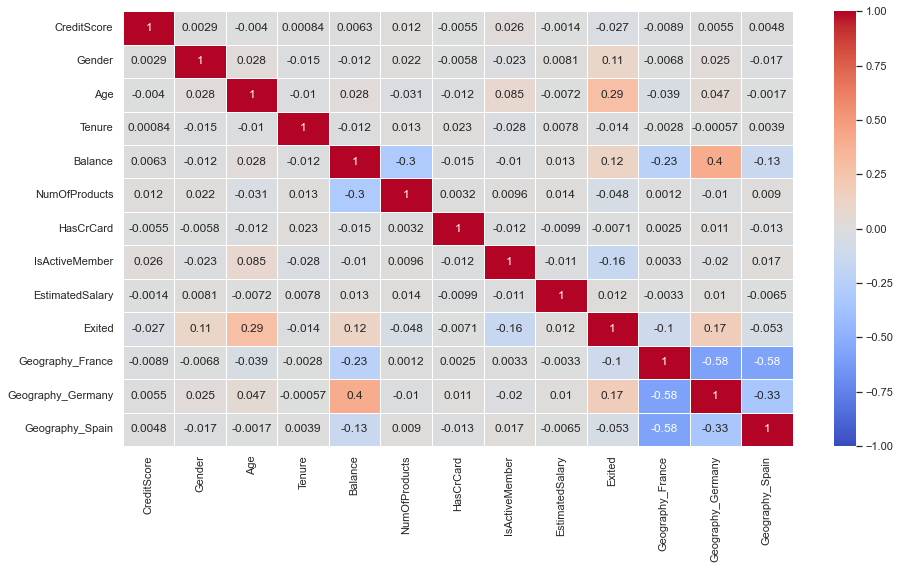

In [175]:
data = df_encoded.drop (['Surname','RowNumber','CustomerId'],axis = 1)
corr = data.corr()

plt.figure(figsize=(15, 8))  # Set the size of the plot
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

> **Findings:**
>> There is no linear relationship between target variable with other variables.